In [1]:
import numpy as np
import matplotlib.pylab as plt
import librosa.display
import IPython.display
import librosa

In [2]:
def plotAudio2(sig,sampleRate):
    
    # this version expects the audio file to have already been opened by librosa
    
    # Adjust the x-axis to represent time
    time=np.arange(0,sig.shape[0])/sr
    
    # Scale the y-axis to represent amplitude from -1 to 1
    excursion=max(abs(sig))
    sigNew = sig / excursion
    
    # Label the x and y axes with variables
    xlabel = 'Time (seconds)'
    ylabel = 'Amplitude'

    # Plot the signal using the x and y axis variables    
    plt.plot(time,sigNew)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [3]:
def makeDelays(sig,sr,sec,numDelays):

    #calculate the number of bytes which corresponds to the offset in milliseconds
    offset=np.int(sr*sec)
    
    #add extra space at the end for the delays
    ending = np.zeros((offset*(numDelays)))
    delayedSig = np.concatenate((sig,ending))
    
    for i in range(numDelays):

        #create some silence
        beginning = np.zeros(offset*(i+1))
        
        #create delayed version of signal
        delay = np.concatenate((beginning,sig))

        #pad the end of delay with zeros to make it the same length as delaysedSig
        delay = np.concatenate((delay,np.zeros((delayedSig.size-delay.size))))
        
        # combine with output signal
        delayedSig= delayedSig + delay
    
    return delayedSig

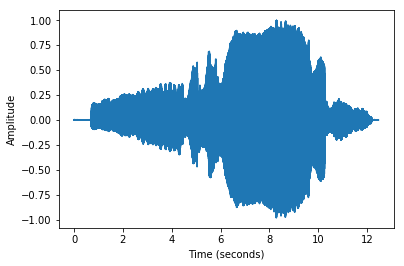

In [7]:
# load original signal
sig , sr = librosa.load('avm.wav')
plotAudio2(sig,sr)
IPython.display.Audio(data=sig, rate=sr)

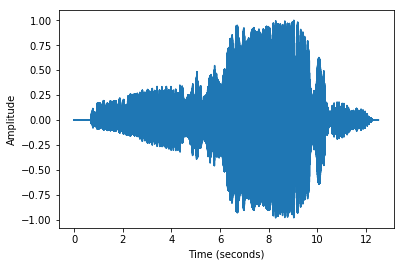

In [8]:
# add one 50 ms delay
delayedSig = makeDelays(sig,sr,0.050,1)
plotAudio2(delayedSig,sr)
IPython.display.Audio(data=delayedSig, rate=sr)

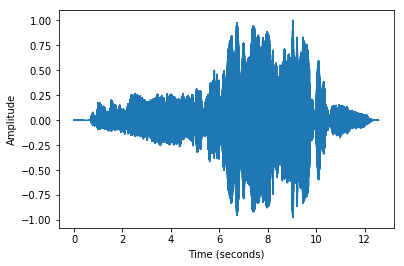

In [9]:
# add two 50 ms delays
delayedSig2 = makeDelays(sig,sr,0.050,2)
plotAudio2(delayedSig2,sr)
IPython.display.Audio(data=delayedSig2, rate=sr)

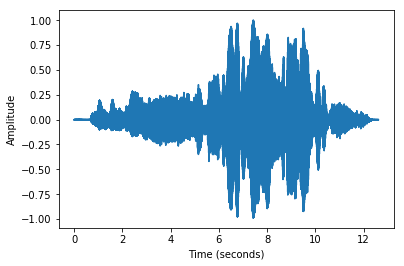

In [11]:
# add three 50 ms delays
delayedSig3 = makeDelays(sig,sr,0.050,3)
plotAudio2(delayedSig3,sr)
IPython.display.Audio(data=delayedSig3, rate=sr)